In [1]:
# import the libraries necessarry for cleaning and eda
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='white')
plt.style.use('seaborn')

pd.set_option('display.max_columns', 100)  # display max rows and columns
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)  # avoid outputing scientific notation

In [2]:
df = pd.read_csv('cardiac_train.csv')

In [3]:
print(df.shape)
df.head()

(50865, 13)


,age,gender,height,weight,bp_high,bp_low,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,56.86,female,1.68,72.00,120.00,80.00,well above normal,well above normal,0,0,1,0,25.51
1,41.89,male,1.80,80.00,110.00,70.00,normal,above normal,1,1,1,0,24.69
2,50.27,male,1.69,87.00,140.00,90.00,normal,normal,0,0,1,0,30.46
3,62.57,male,1.88,104.00,160.00,100.00,well above normal,well above normal,0,0,1,1,29.43
4,64.18,female,1.68,85.00,130.00,80.00,above normal,well above normal,0,0,1,1,30.12


## EDA
___

In [4]:
df.describe().iloc[[3,1,5,6,7],:]

,age,height,weight,bp_high,bp_low,smoke,alco,active,cardio,bmi
min,29.58,1.25,32.00,60.00,40.00,0.00,0.00,0.00,0.00,15.01
mean,53.24,1.65,71.65,126.18,81.18,0.09,0.05,0.80,0.48,26.36
50%,53.92,1.65,70.00,120.00,80.00,0.00,0.00,1.00,0.00,25.88
75%,58.34,1.70,79.00,140.00,90.00,0.00,0.00,1.00,1.00,29.02
max,64.93,2.07,125.00,240.00,180.00,1.00,1.00,1.00,1.00,35.00


In [5]:
df.corr().abs()['cardio']

age       0.24
height    0.00
weight    0.15
bp_high   0.43
bp_low    0.34
smoke     0.01
alco      0.01
active    0.03
cardio    1.00
bmi       0.17
Name: cardio, dtype: float64

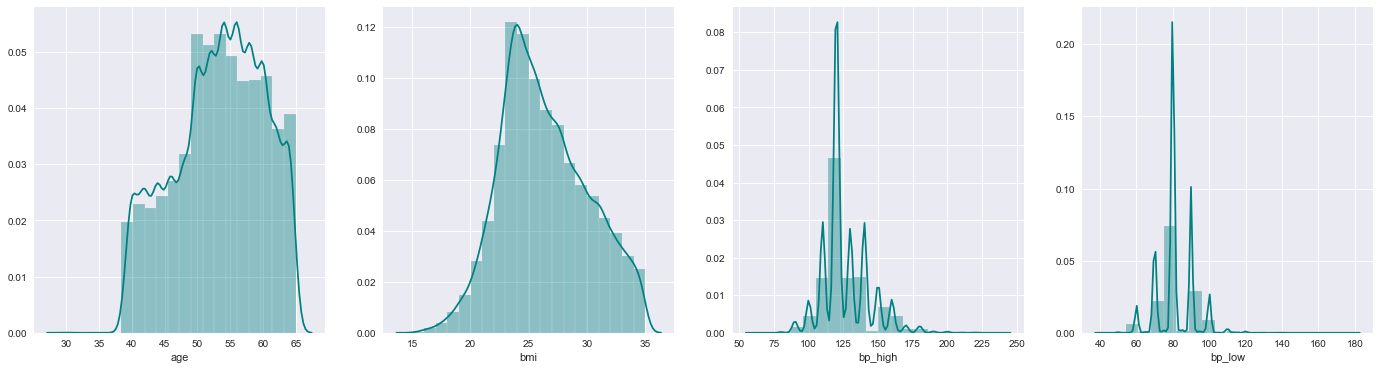

In [6]:
fig = plt.figure(figsize = (24,6))

num_cols = ['age','bmi','bp_high','bp_low',]

for n in range(0,4):
    ax = fig.add_subplot(1,4,n+1)
    sns.distplot(df[num_cols[n]], bins = 20, ax = ax, axlabel= num_cols[n],color='teal',)
plt.show()    

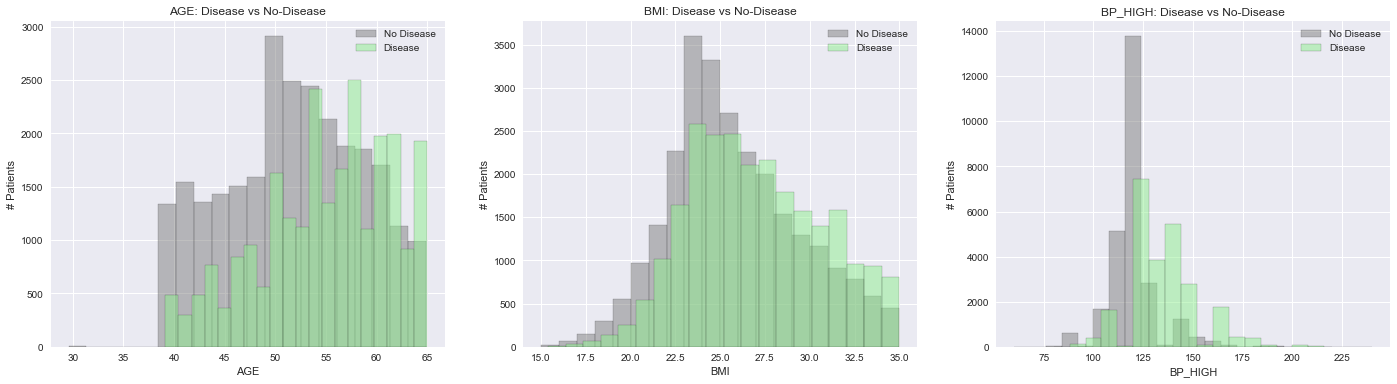

In [16]:
sns.set_style('darkgrid')
fig = plt.figure(figsize = (24,6))
fig.subplots_adjust(hspace = .30)

cols = ['age','bmi','bp_high']

for n in range(0,3):
    ax = fig.add_subplot(1,3,n+1)
    ax.hist(df[df['cardio'] ==0][cols[n]], bins = 20, label ='No Disease', alpha = .50,edgecolor= 'black',color ='grey')
    ax.hist(df[df['cardio']==1][cols[n]], bins = 20, label = 'Disease', alpha = .50, edgecolor = 'black',color = 'lightgreen')
    ax.set_title(cols[n].upper()+': Disease vs No-Disease')
    ax.set_xlabel(cols[n].upper())
    ax.set_ylabel('# Patients')
    ax.legend(loc = 'upper right')
plt.show()

In [ ]:
df['bmi_cat'] = pd.cut(df['bmi'], right= False, bins = [0,18.5,25,30,36], 
                       labels=['underweight','normal','overweight','obese'])
df['bmi_cat'].value_counts(dropna = False)

In [ ]:
df.groupby('bmi_cat')['cardio'].mean()

In [ ]:
dummy_df = pd.get_dummies(df, columns=['bmi_cat'], prefix = '', prefix_sep = '', drop_first= True)